<a href="https://colab.research.google.com/github/BrunoKlein504/depression_pln/blob/main/ML_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste

In [ ]:
!pip install pandas nltk scikit-learn textblob

In [ ]:
#INFORMAÇÕES
#link pra download https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression
#MODELO BASE -> https://www.kaggle.com/models/angelchaudhary/texts-emotions-prediction-model
# OUTRO DATA_SET = https://huggingface.co/datasets/joangaes/depression
# DATA_SET REDDIT = https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# TODO: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  MODELO DE MACHINE LEARNING
#       https://textblob.readthedocs.io/en/dev/ Textblob -> Bag_of_Words e classificação ternária

In [ ]:
#DATASET
dataset = kagglehub.dataset_download("infamouscoder/mental-health-social-media")
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


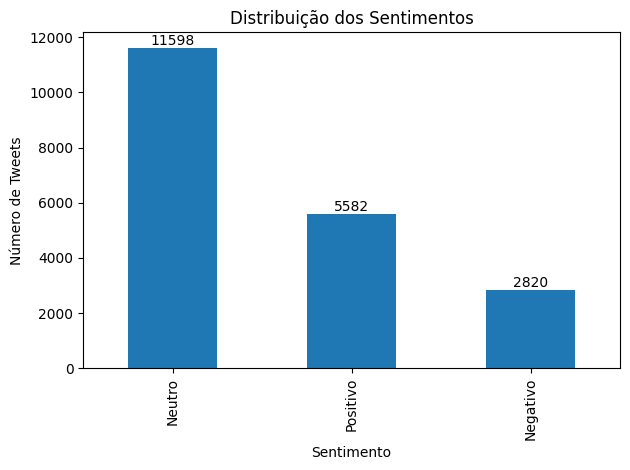

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression

#IMPORTs
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd  # Adicionado para garantir que o pandas seja importado corretamente

#DEFs
def analisar_sentimento(texto):
    return TextBlob(texto).sentiment.polarity

def preprocessar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)  # remover URLs
    texto = re.sub(r"[^a-zA-Z\s]", '', texto)  # remover pontuações
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)

def classificar_sentimento(polaridade):
    if polaridade > 0.1:
        return "Positivo"
    elif polaridade < -0.1:
        return "Negativo"
    else:
        return "Neutro"

#DATASET
dataset = kagglehub.dataset_download("infamouscoder/mental-health-social-media")
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")

#TRATAMENTO
df = df.dropna(subset=["post_text"])  # remover textos vazios

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

df["texto_limpo"] = df["post_text"].apply(preprocessar)
df["polaridade"] = df["texto_limpo"].apply(analisar_sentimento)
df["sentimento"] = df["polaridade"].apply(classificar_sentimento)

#VISUALIZAÇÃO
ax = df["sentimento"].value_counts().plot(kind='bar', title="Distribuição dos Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Tweets")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()
#Essa análise indica que a maior parte das palavras desse dataset está com o sentimento "neutro" e sua minoria está exposta com o sentimento "negativo"

<ipython-input-8-a47048739120>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentimentos.index, y=sentimentos.values, palette=cores)


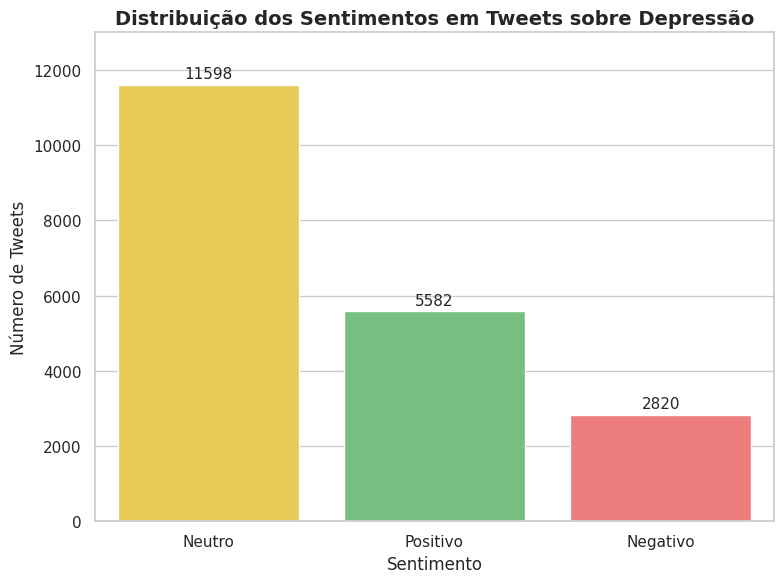

In [ ]:
#GRAFICO MELHOR QUE O DO MORISCO kkkkkkkkkk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulação dos dados de sentimentos
sentimentos = pd.Series({
    "Neutro": 11598,
    "Positivo": 5582,
    "Negativo": 2820
})

# Estilo Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Paleta de cores personalizada
cores = ["#FFD93D", "#6BCB77", "#FF6B6B"]

# Gráfico de barras
ax = sns.barplot(x=sentimentos.index, y=sentimentos.values, palette=cores)

# Títulos e rótulos
plt.title("Distribuição dos Sentimentos em Tweets sobre Depressão", fontsize=14, weight='bold')
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Número de Tweets", fontsize=12)

# Limite superior do eixo Y ajustado
plt.ylim(0, 13000)

# Rótulos acima das barras
for i, valor in enumerate(sentimentos.values):
    plt.text(i, valor + 100, str(valor), ha='center', va='bottom', fontsize=11)

# Layout final
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of the bag of words matrix: (20000, 33058)
Top 10 palavras mais frequentes: [('depression', np.int64(880)), ('one', np.int64(696)), ('love', np.int64(597)), ('know', np.int64(580)), ('amp', np.int64(492)), ('good', np.int64(455)), ('go', np.int64(432)), ('say', np.int64(412)), ('new', np.int64(406)), ('thank', np.int64(400))]


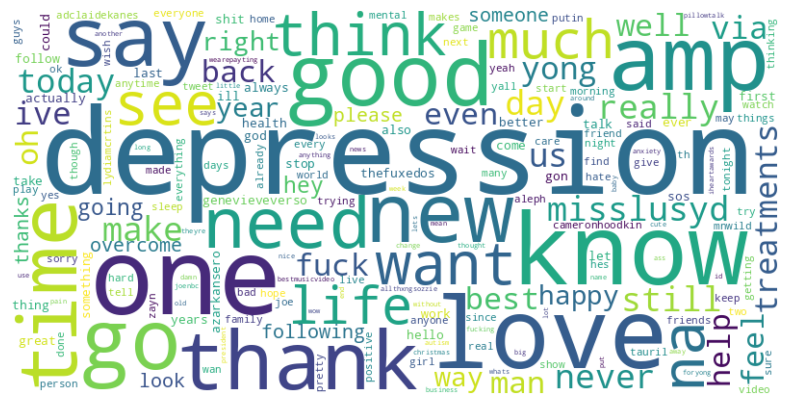

In [ ]:
#BAGWORD - dataset https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar recursos necessários
nltk.download('punkt')
nltk.download('stopwords')

# Carregar o dataset
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv")

# Lista personalizada de palavras para remover (conjunções, pronomes, gírias etc.)
stop_words = set(stopwords.words('english'))
extra_words = {
    'you', 'youre', 'im', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'thats', 'theres', 'isnt', 'wasnt', 'arent', 'werent', 'dont', 'didnt', 'doesnt',
    'and', 'but', 'or', 'so', 'because', 'although', 'however', 'therefore', 'trump', 'realdonaldtrump',
    'twitter', 'cant', 'twitter', 'people','would', 'rt', 'putin'
    'biden', 'covid', 'corona', 'lol', 'omg', 'uh', 'uhh', 'um', 'like', 'just', 'get', 'got'
}
palavras_excluir = stop_words.union(extra_words)

# Função de limpeza de texto
def limpar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)  # remover caracteres não alfabéticos
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in palavras_excluir]
    return " ".join(tokens)

# Aplicar limpeza ao texto
df['cleaned_text'] = df['post_text'].apply(limpar_texto)

# Criar a Bag of Words com texto já limpo
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Exibir o tamanho da matriz Bag of Words
print("Shape of the bag of words matrix:", X.shape)

# Contagem de frequência das palavras mais comuns
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Exibir as 10 palavras mais frequentes
print("Top 10 palavras mais frequentes:", word_freq[:10])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#A partir dessa análise rápida é possivel ter um direcionamento do conteúdo do dataset. Essas são as palavras que mais aparecem em 20000 tweets, foram contadas 32927 palavras.

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://huggingface.co/datasets/joangaes/depression

import re
import requests
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Baixar dados em lotes até o fim
def baixar_todos_dados(passo=100):
    todos_dados = []
    offset = 0
    while True:
        url = f"https://datasets-server.huggingface.co/rows?dataset=joangaes%2Fdepression&config=default&split=train&offset={offset}&length={passo}"
        resp = requests.get(url)
        if resp.status_code != 200:
            break

        dados = resp.json()["rows"]
        if not dados:
            print("Fim dos dados.")
            break

        todos_dados.extend([r["row"] for r in dados])
        if len(dados) < passo:
            print("Último lote recebido.")
            break
        offset += passo

    return pd.DataFrame(todos_dados)

# Baixar o dataset completo
df = baixar_todos_dados()

# Preparar NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessamento e análise
def preprocessar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)
    texto = re.sub(r"[^a-zA-Z\s]", '', texto)
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)

def analisar_sentimento(texto):
    return TextBlob(texto).sentiment.polarity

def classificar_sentimento(polaridade):
    if polaridade > 0.1:
        return "Positivo"
    elif polaridade < -0.1:
        return "Negativo"
    else:
        return "Neutro"

# Aplicar no DataFrame
df = df.dropna(subset=["text"])
df["texto_limpo"] = df["text"].apply(preprocessar)
df["polaridade"] = df["texto_limpo"].apply(analisar_sentimento)
df["sentimento"] = df["polaridade"].apply(classificar_sentimento)

# Visualização
ax = df["sentimento"].value_counts().plot(kind='bar', title="Distribuição dos Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Textos")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

#Essa análise indica que a maior parte das palavras desse dataset está com o sentimento "neutro" e sua minoria está exposta com o sentimento "negativo"

In [ ]:
#ANALISE PALAVRAS POSITIVAS E NEGATIVAS
#Dataset utilizado foi o do twitter -> https://huggingface.co/datasets/joangaes/depression


import pandas as pd
import requests
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baixar os dados do Hugging Face em lotes
def baixar_todos_dados(passo=100):
    todos_dados = []
    offset = 0
    while True:
        url = f"https://datasets-server.huggingface.co/rows?dataset=joangaes%2Fdepression&config=default&split=train&offset={offset}&length={passo}"
        resp = requests.get(url)
        if resp.status_code != 200:
            break

        dados = resp.json()["rows"]
        if not dados:
            print("Fim dos dados.")
            break

        todos_dados.extend([r["row"] for r in dados])
        if len(dados) < passo:
            print("Último lote recebido.")
            break
        offset += passo

    return pd.DataFrame(todos_dados)

# Baixar o dataset completo
df = baixar_todos_dados()

# Limpeza dos textos: removendo caracteres não alfabéticos e convertendo para minúsculas
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# Criar a Bag of Words
vectorizer = CountVectorizer(stop_words='english')  # Ignorar palavras comuns em inglês
X = vectorizer.fit_transform(df['cleaned_text'])

# Exibir a Bag of Words
print("Shape of the bag of words matrix:", X.shape)

# Contagem de frequência das palavras mais comuns
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))  # Agora é um dicionário
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print(word_freq[:10])  # Exibe as 10 palavras mais frequentes

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(word_freq))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#A partir dessa análise rápida é possivel ter um direcionamento do conteúdo do dataset. Essas são as palavras que mais aparecem em 5000 tweets, foram contadas 26672 palavras.

In [ ]:
#ESTATISTICA DAS PALAVRAS POSITIVAS E NEGATIVAS

# MONOGRAFIA - Segundo Semestre (Metodologia)

In [ ]:
from kagglehub import KaggleDatasetAdapter

In [ ]:
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    'infamouscoder/mental-health-social-media',
    'Mental-Health-Twitter.csv'
)

Using Colab cache for faster access to the 'mental-health-social-media' dataset.


In [ ]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
